The objective of this notebook is to answer these questions:

1. Which device OS versions have the best and worst ratings.

2. What is the average rating by day.

3. How do ratings change over time.

4. Average devices installed over time and how they change.

5. Compare install to uninstall rates.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
#import datetime as dt
#from google.colab import files

#data = files.upload()

In [2]:
installs = pd.read_csv(r"stats_installs_overview.csv", encoding = 'utf-16')
ratings = pd.read_csv(r"stats_ratings_ratings_in.evstudios.josh_202107_os_version.csv", encoding = 'utf-16')

ratings.head()

,Date,Package Name,Android OS Version,Daily Average Rating,Total Average Rating
0,2021-07-01,in.evstudios.josh,Android 4.4,NaN,2.00
1,2021-07-01,in.evstudios.josh,Android 5.0,NaN,1.00
2,2021-07-01,in.evstudios.josh,Android 5.1,NaN,4.50
3,2021-07-01,in.evstudios.josh,Android 6.0,NaN,3.92
4,2021-07-01,in.evstudios.josh,Android 7.0,NaN,4.22


In [ ]:
ratings.rename(columns = {"Date": 'date','Package Name':'package_name', 'Android OS Version' : 'android_os_version', 'Daily Average Rating' :'daily_average_rating',
       'Total Average Rating' : 'total_average_rating'}, inplace = True)

In [ ]:
installs['Date'] = pd.to_datetime(install['Date'])
ratings['Date'] = pd.to_datetime(rating['Date'])

In [ ]:
installs.describe()

,Daily Device Installs,Daily Device Uninstalls,Daily Device Upgrades,Total User Installs,Daily User Installs,Daily User Uninstalls,Active Device Installs,Install events,Update events,Uninstall events
count,31.000000,31.0,31.0,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,20.387097,0.0,0.0,0.0,20.032258,19.967742,219.741935,22.096774,1.935484,20.354839
std,55.288744,0.0,0.0,0.0,54.295171,35.139232,59.941064,58.137398,3.595696,35.597330
min,1.000000,0.0,0.0,0.0,1.000000,3.000000,164.000000,3.000000,0.000000,3.000000
25%,5.000000,0.0,0.0,0.0,5.000000,5.500000,174.500000,6.000000,0.000000,5.500000
50%,6.000000,0.0,0.0,0.0,6.000000,9.000000,179.000000,7.000000,0.000000,9.000000
75%,8.500000,0.0,0.0,0.0,8.000000,16.000000,275.500000,9.500000,1.500000,16.000000
max,299.000000,0.0,0.0,0.0,291.000000,181.000000,335.000000,316.000000,14.000000,183.000000


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  353 non-null    object        
 1   package_name          353 non-null    object        
 2   android_os_version    341 non-null    object        
 3   daily_average_rating  23 non-null     float64       
 4   total_average_rating  353 non-null    float64       
 5   Date                  353 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 16.7+ KB


In [ ]:
ratings.describe()

,daily_average_rating,total_average_rating
count,23.000000,353.000000
mean,4.621739,3.408329
std,0.874870,1.004497
min,1.000000,1.000000
25%,4.730000,3.370000
50%,5.000000,3.640000
75%,5.000000,3.970000
max,5.000000,5.000000


In [ ]:
ratings.columns

Index(['date', 'package_name', 'android_os_version', 'daily_average_rating',
       'total_average_rating', 'Date'],
      dtype='object')

Determining the best and worst OS Version (Android):

In [ ]:
os_ratings = pd.DataFrame(ratings.groupby('android_os_version')['total_average_rating'].median()).reset_index()
best_os = os_ratings[os_ratings.total_average_rating == os_ratings.total_average_rating.max()].android_os_version.item()
worst_os = os_ratings.loc[os_ratings.total_average_rating == os_ratings.total_average_rating.min(),'android_os_version'].item()
print(f'Best Android OS version based on Ratings: {best_os}')
print(f'Worst Android OS version based on Ratings: {worst_os}')

Best Android OS version based on Ratings: Android 5.1
Worst Android OS version based on Ratings: Android 5.0


Determining average ratings by day:

In [ ]:
rating.daily_average_rating = ratings.total_average_rating.pct_change()
rating.head()

,Date,Package Name,Android OS Version,Daily Average Rating,Total Average Rating
0,2021-07-01,in.evstudios.josh,Android 4.4,NaN,2.00
1,2021-07-01,in.evstudios.josh,Android 5.0,NaN,1.00
2,2021-07-01,in.evstudios.josh,Android 5.1,NaN,4.50
3,2021-07-01,in.evstudios.josh,Android 6.0,NaN,3.92
4,2021-07-01,in.evstudios.josh,Android 7.0,NaN,4.22


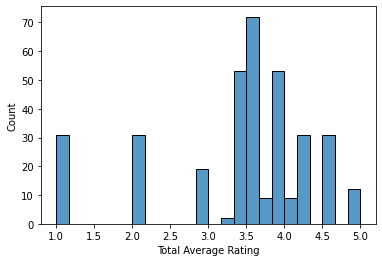

<Figure size 432x288 with 0 Axes>

In [4]:
sns.histplot(ratings['Total Average Rating']);
fig = plt.figure()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

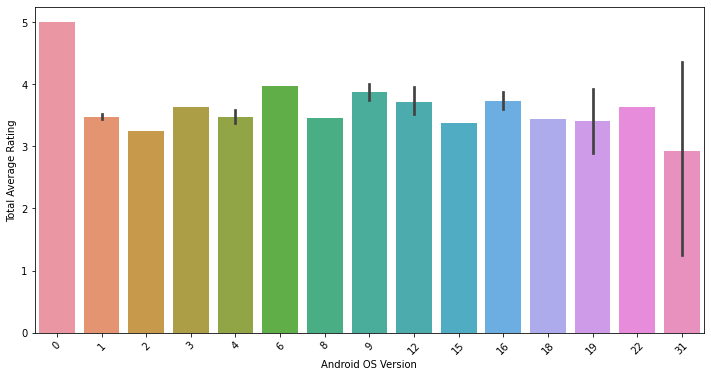

In [5]:
user_rating_score=ratings.groupby("Total Average Rating")['Android OS Version'].count().reset_index().sort_values(by='Total Average Rating').reset_index(drop=True)
plt.figure(figsize=(12,6))
sns.barplot(x='Android OS Version',y='Total Average Rating', data=user_rating_score)
plt.xticks(rotation=45)

Percentage change over time:

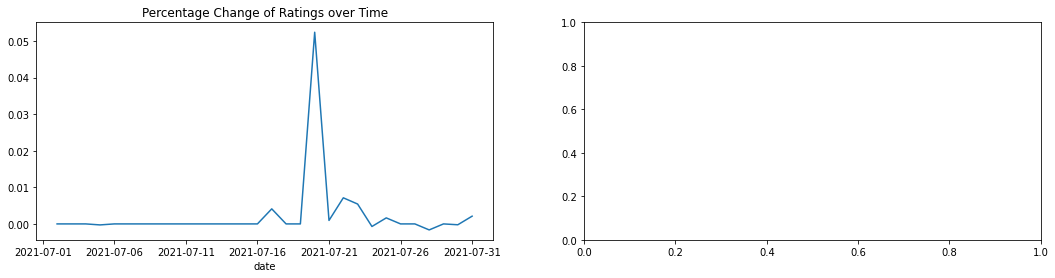

In [ ]:
title1 = 'Percentage Change of Ratings over Time'
title2 = 'Percentage Change of Ratings over Month'
plt.figure(figsize = (18,4))
plt.subplot(1,2,1)
ratings.groupby( ['date'] ).total_average_rating.mean().pct_change().plot(kind = 'line', title = title1)
plt.subplot(1,2,2)
#ratings.groupby( ['monthe'] ).total_average_rating.mean().pct_change().plot(kind = 'line', title = title2)

Determining average device installed over time and how they change:

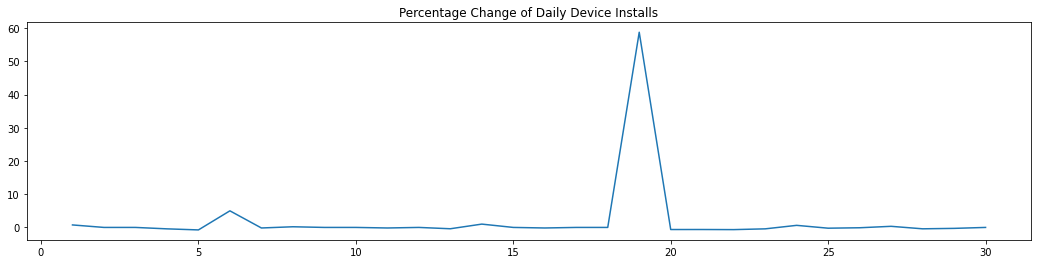

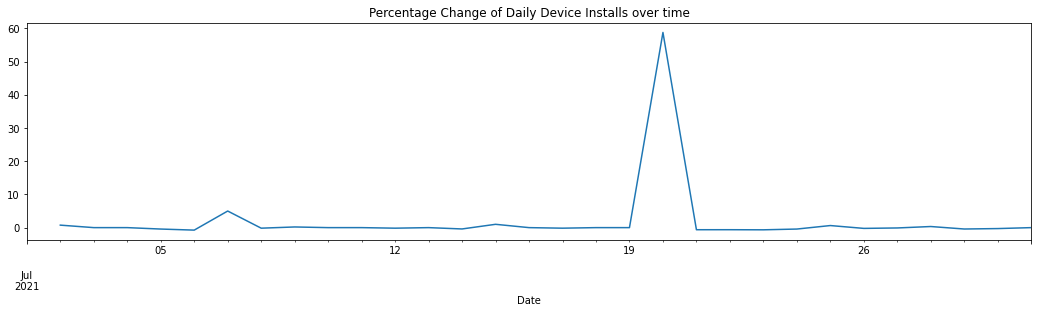

In [ ]:
plt.figure(figsize = (18,4))
install['Daily Device Installs'].pct_change().plot(kind = 'line', title = 'Percentage Change of Daily Device Installs')
plt.show()
plt.figure(figsize = (18,4))
install.groupby('Date')['Daily Device Installs'].mean().pct_change().plot(kind = 'line', title = 'Percentage Change of Daily Device Installs over time')
plt.show()

Comparing install and uninstall rates:

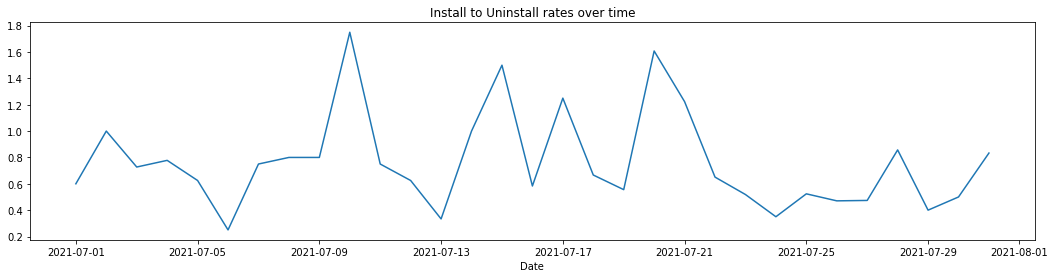

In [ ]:
#install['Daily User Uninstalls']/install['Daily User Installs']
in_u_rate = install['Daily User Installs']/install['Daily User Uninstalls']
plt.figure(figsize = (18,4))
plt.title( 'Install to Uninstall rates over time')
sns.lineplot(x = install.Date, y = in_u_rate)
plt.show()

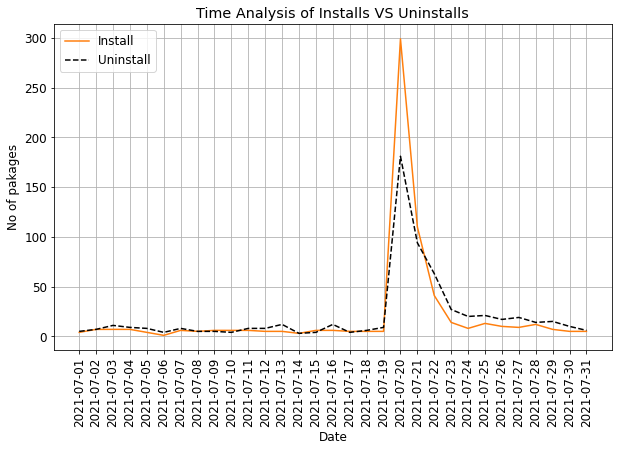

In [6]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(installs["Date"], installs["Daily Device Installs"], color='tab:orange', label = "Install")
ax.plot(installs["Date"], installs['Daily User Uninstalls'], color='black', linestyle='--', label='Uninstall')



# Same as above
ax.set_xlabel('Date')
ax.set_ylabel('No of pakages')
ax.set_title('Time Analysis of Installs VS Uninstalls')
plt.xticks(rotation = 90)
ax.grid(True)
ax.legend(loc='upper left')

We can conclude that J.O.S.H (Android) is installed more often than uninstalled.